In [ ]:
pip install konlpy

     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 19.4 MB 58.9 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 86 kB 4.5 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 448 kB 47.0 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [ ]:
import io
import pandas as pd
import numpy as np
import csv
from google.colab import files
import pandas as pd # to use dataframes
from math import log # for IDF calculation
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import konlpy
import re
from konlpy.tag import Okt

##File uploading

There are two files
1. review file
2. stopword file

In [ ]:
f =files.upload()

Saving stopword.csv to stopword.csv
Saving total_review.csv to total_review.csv


In [ ]:
#List stopwords.
sw = pd.read_csv('./stopword.csv')
sw = sw.transpose()
sw.reset_index(drop=False, inplace=True)
stop_word = np.array(sw.iloc[0].tolist()) #stop_word : stopword list

#Create a review data frame.
df=pd.read_csv('./total_review.csv')
df['menu'] = df['menu'].str.strip() # review dataframe

##Data Preprocessing

In [ ]:
df = df.drop('price', axis =1)
df = df.dropna(axis=0)
df

category  ...                                             review
0       chicken  ...  Í∏∞Î≥∏ Íµ¨ÏÑ±ÏùÄ ÏπòÌÇ®Í≥º ÎçîÎ∂àÏñ¥ÏÑú ÏπòÌÇ®Î¨¥, Í∑∏Î¶¨Í≥† bbq ÏãúÌÅ¨Î¶ø ÏñëÎÖêÏπòÌÇ®ÏÜåÏä§, ÎπÑÎπÑÏÜåÏä§(...
1       chicken  ...  \n\nÍ∞úÏù∏Ï†ÅÏúºÎ°ú Ï†úÏùº ÎßõÏûàÎã§Í≥† ÏÉùÍ∞ÅÌïòÎäî ÌõÑÎùºÏù¥ÎìúÏπòÌÇ®ÏùÄ\n\nÎπÑÎπÑÌÅê Ìô©Í∏àÏò¨Î¶¨Î∏åÏπòÌÇ®Ïù¥...
2       chicken  ...  Îã≠Îã§Î¶¨Î•º Îì§Ïñ¥Î≥¥ÏïòÎã§. Î∞îÎ°ú ÏòÜÏóê Îã≠Îã§Î¶¨Í∞Ä ÌïòÎÇò Îçî Î≥¥Ïù¥ÎÑ§. ÏÇ¨ÏßÑÏúºÎ°ú Î≥¥Í∏∞Îßå Ìï¥ÎèÑ Î∞î...
3       chicken  ...  \n\n \n\nÏùºÎã® ÌäÄÍπÄÏÉÅÌÉú Ï†ïÎßê Î∞îÏÇ≠Ìï¥Ïöî. ÎßåÏ†∏Î≥¥Î©¥ Î∞îÏÇ≠Î∞îÏÇ≠Ìïú ÎäêÎÇåÏù¥ Îì§ Ï†ïÎèÑÎ°ú...
4       chicken  ...  ÏúÑÍ∞Ä Î∞îÎ°ú Ìô©Í∏àÏò¨Î¶¨Î∏åÏπòÌÇ®Ïù¥ÏóêÏöî. Ï†ïÎßêÎ°ú Ìô©Í∏àÎπõÏù¥ ÎÇòÏöî. ÍµêÏ¥åÏπòÌÇ®Ïù¥ÎÇò Ïó¨ÌÉÄ ÏπòÌÇ®Í≥ºÎäî ...
...         ...  ...                                                ...
3955  snack bar  ...                                    ÎßõÏûàÏñ¥Ïöî~ Í∞ÄÎÅî ÏãúÏºúÎ®πÏäµÎãàÎã§
3956  snack bar  ...  ÏßÑÏßú ÎßõÏûàÍ≤åÎ®πÏóàÏñ¥Ïöî Ï†ÄÌïúÌÖê ÏÜåÏä§Í∞Ä Ï¢Ä ÏûêÍ∑πÏ†ÅÏù¥Îùº Ï°∞Í∏àÎßå Îã¨ÎùºÌñàÎçîÎãà Ï†ú ÏûÖÎßõÏóî ÌèâÏÜåÎ≥¥...
3957  snack bar  ...                                       Í∞àÎ¶≠ ÌååÏö∞ÎçîÍ∞Ä ÎßõÏûàÏñ¥Ïöî
3958  snack bar  ...                                   ÎßõÏûàÏñ¥Ïöî, ÏïºÏãùÏúºÎ°ú ÏµùÏò§!!!
3959  snack bar  ...                          ÎßõÏûàÎäîÎç∞ ÏñëÏù¥ Ï°∞Í∏à ÏûëÎÑ§Ïöî„ÖéÍ∑∏ÎûòÎèÑ ÎßõÏùÄÏµúÍ≥†üëçüëç

[3927 rows x 4 columns]

In [ ]:
final_data = pd.DataFrame({'store':df['restaurant'], 'menu':df['menu']})
final_data

store       menu
0           bbq    Ìô©Í∏àÏò¨Î¶¨Î∏åÏπòÌÇ®
1           bbq    Ìô©Í∏àÏò¨Î¶¨Î∏åÏπòÌÇ®
2           bbq    Ìô©Í∏àÏò¨Î¶¨Î∏åÏπòÌÇ®
3           bbq    Ìô©Í∏àÏò¨Î¶¨Î∏åÏπòÌÇ®
4           bbq    Ìô©Í∏àÏò¨Î¶¨Î∏åÏπòÌÇ®
...         ...        ...
3955  ·Ñê·Ö°·Ñè·Ö©·Ñã·Ö£·Ñè·Öµ·Üº  Í∞àÎ¶≠ÏπòÏ¶à ÌÉÄÏΩîÏïºÎÅº
3956  ·Ñê·Ö°·Ñè·Ö©·Ñã·Ö£·Ñè·Öµ·Üº  Í∞àÎ¶≠ÏπòÏ¶à ÌÉÄÏΩîÏïºÎÅº
3957  ·Ñê·Ö°·Ñè·Ö©·Ñã·Ö£·Ñè·Öµ·Üº  Í∞àÎ¶≠ÏπòÏ¶à ÌÉÄÏΩîÏïºÎÅº
3958  ·Ñê·Ö°·Ñè·Ö©·Ñã·Ö£·Ñè·Öµ·Üº  Í∞àÎ¶≠ÏπòÏ¶à ÌÉÄÏΩîÏïºÎÅº
3959  ·Ñê·Ö°·Ñè·Ö©·Ñã·Ö£·Ñè·Öµ·Üº  Í∞àÎ¶≠ÏπòÏ¶à ÌÉÄÏΩîÏïºÎÅº

[3927 rows x 2 columns]

Collect reviews according to the same menu.

In [ ]:
data = pd.DataFrame(df.groupby('menu')['review'])
data.columns=['menu','review']
for i in range(len(data)):
  list = data['review'][i]
  n_review = ','.join(str(e) for e in list)
  data['review'][i] = n_review
menu_review = data
menu_review #Dataframe with only menus and reviews

menu                                             review
0          85Íµ≠Î∞•  ÎÇ†Ïî®ÎèÑ Ï∂•Í≥† Ìï¥ÏÑú Í∞ÑÎßåÏóê ÏãúÏºú Î®πÏóàÎäîÎç∞ Ï†ïÎßê ÎßõÏûàÏñ¥Ïöî!! Í∑ºÎç∞ ÏñëÌåå Ïû•ÏïÑÏ∞åÎäî Î≥ÑÎ£®....
1       T-REXÎ≤ÑÍ±∞  Î≤àÏä§Î≥¥Îã§ ÌÅ∞ 'ÌÜµÎã§Î¶¨ÏÇ¥'ÏπòÌÇ®Ìå®Ìã∞Ïóê Î∂ÄÎìúÎü¨Ïö¥ ÌÅ¨Î¶ºÏñ¥ÎãàÏñ∏ ÏÜåÏä§Î•º ÎçîÌïú Í∞ÄÏÑ±ÎπÑ Ï†úÌíà,ÏñëÏÉÅ...
2    doubleX2Î≤ÑÍ±∞  ÏàúÎπÑÌîÑÌå®Ìã∞ 2Ïû•, ÏπòÏ¶à 2Ïû•ÏùÑ ÌôúÏö©Ìïú ÎßõÏù¥ Ï°∞ÌôîÎ°úÏö¥ Ï†ïÌÜµ ÏïÑÎ©îÎ¶¨Ïπ∏ Î≤ÑÍ±∞,ÏàòÏ†úÎ≤ÑÍ±∞ÎßõÏù¥...
3           Í∞àÎ¶≠Ï°±  ÎßõÏûàÍ≤å Ïûò Î®πÏóàÏäµÎãàÎã§. Ïò§ÎûúÎßåÏóê Í∞àÎ¶≠Ï°±ÏùÑ ÏãúÏº∞ÎäîÎç∞ ÎßõÏùÄ ÏûàÏßÄÎßå ÏñëÏùÄ Ï°∞Í∏à Ï†ÅÎÑ§Ïöî. ...
4     Í∞àÎ¶≠ÏπòÏ¶à ÌÉÄÏΩîÏïºÎÅº  Í∞àÎ¶≠ÏπòÏ¶àÍ∞Ä Ï†úÏùº ÎßõÏûàÏñ¥Ïöî!,ÎßõÏûàÎäîÎç∞ Ï°∞Í∏à ÎàåÎü¨Î∂ôÏñ¥ÏÑú ÏôîÏñ¥Ïöî,Î©ÄÏñ¥ÏÑú Ï°∞Í∏à ÏãùÏóàÏßÄÎßå Îßõ...
..          ...                                                ...
151     Ìï´ÌÅ¨Î¶¨Ïä§ÌîºÎ≤ÑÍ±∞  ÌÜ†ÎßàÌÜ†ÏôÄ Î†àÌÉÄÏä§Îì±Ïùò ÏïºÏ±ÑÏôÄ ÌïòÎ∞îÎÑ§Î°úÈ¶ôÏù¥ Í∞ÄÎØ∏Îêú Í∞ÄÏä¥ÏÇ¥Î°ú ÎßåÎì† Îß§ÏΩ§Ìïú Premium ...
152    Ìï¥Î¨º ÏàúÎëêÎ∂ÄÏ∞åÍ∞ú  ÏûòÎ®πÏóáÏäµÎãàÎã§~~ ÏÇ¨Ïû•Îãò,ÏñëÏù¥..3Ïù∏Î∂ÑÏßúÎ¶¨Î•º ÏãúÏº∞ÎäîÎç∞ 5Ïù∏Î∂ÑÏùÄ Îê†Í±∞Í∞ôÏùÄ ÏñëÏóêÎã§Í∞Ä ÏåàÎèÑ...
153         Ìñ•Ï±ÑÏ°±  ÏõêÎûò Îß§Ïû•ÏóêÏÑú Î®πÏóàÎäîÎç∞ Ïù¥ÏÇ¨ÏôÄÏÑú Î∞∞Îã¨ÏãúÏºúÎ®πÏóàÎÑ§Ïöî. !,ÏïûÎã§Î¶¨Îßå ÏãúÏºú Î®πÎã§Í∞Ä ÏãúÍ∞ÑÏù¥ ...
154        ÌôçÏñ¥ÏÇºÌï©                          Î∞∞Îã¨Ïò§Ïã†Î∂ÑÎèÑ ÏπúÏ†àÌïòÏãúÍ≥† ÎßõÏûàÍ≤å Ïûò Î®πÏóàÏäµÎãàÎã§.
155     Ìô©Í∏àÏò¨Î¶¨Î∏åÏπòÌÇ®  Í∏∞Î≥∏ Íµ¨ÏÑ±ÏùÄ ÏπòÌÇ®Í≥º ÎçîÎ∂àÏñ¥ÏÑú ÏπòÌÇ®Î¨¥, Í∑∏Î¶¨Í≥† bbq ÏãúÌÅ¨Î¶ø ÏñëÎÖêÏπòÌÇ®ÏÜåÏä§, ÎπÑÎπÑÏÜåÏä§(...

[156 rows x 2 columns]

In [ ]:
okt = konlpy.tag.Okt()

#sub_specieal : Function to remove everything except Korean, numbers, and English
def sub_special(text):
  pattern = '([a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+)' # Remove E-mail
  text = re.sub(pattern=pattern, repl='', string=text)

  pattern = '(http|ftp|https)://(?:[-\w.]|(?:%[\da-fA-F]{2}))+' # Remove URL
  text = re.sub(pattern=pattern, repl='', string=text)

  pattern = '([a-heh-„Ö£]+)' # Remove Korean consonants and vowels
  text = re.sub(pattern=pattern, repl='', string=text)

  pattern = '<[^>]*>' # Remove HTML tags
  text = re.sub(pattern=pattern, repl='', string=text)

  pattern = '[^\w\s]' # Remove special characters
  text = re.sub(pattern=pattern, repl='', string=text)

  text = re.sub('[^0-9a-zA-Z„Ñ±-„ÖéÍ∞Ä-Ìû£]', ' ', text)

  return re.sub(r'[^„Ñ±-„Öé„Öè-„Ö£Í∞Ä-Ìû£0-9a-zA-Z ]','',text)

STOP_WORDS = ['ÏùåÎ£å','ÏÜåÏä§','Ïù∏ÏÑ∏Ìä∏','Ïù∏','mL','ÏÑ†ÌÉù','Ï∂îÍ∞Ä','Î≥ÄÍ≤Ω','pcs','g','ÏÑ†ÌÉù','ÏÇ¨Ïù¥Îìú','M','L','R','ÏÑ∏Ìä∏','ÏàúÏÇ¥','ÌïòÎã§',',','\n','Ïù¥', 'Ïûà', 'Ìïò', 'Í≤É', 'Îì§', 'Í∑∏', 'Îêò', 'Ïàò', 'Ïù¥', 'Î≥¥', 'Ïïä', 'ÏóÜ', 'ÎÇò', 'ÏÇ¨Îûå', 'Ï£º', 'ÏïÑÎãà', 'Îì±', 'Í∞ô', 'Ïö∞Î¶¨', 'Îïå', 'ÎÖÑ', 'Í∞Ä', 'Ìïú', 'ÏßÄ', 'ÎåÄÌïò', 'Ïò§', 'Îßê', 'Ïùº', 'Í∑∏Î†á', 'ÏúÑÌïò','Ïùò','Í∞Ä','Ïù¥','ÏùÄ','Îì§','Îäî','Ï¢Ä','Ïûò','Í±ç','Í≥º','ÎèÑ','Î•º','ÏúºÎ°ú','Ïûê','Ïóê','ÏôÄ','Ìïú','ÌïòÎã§']

def morph_and_stopword(s):
  tok = ""
  #morpheme analysis
  tmp = okt.morphs(s, stem=True)

  #handling stopwords
  for token in tmp:
    if token not in STOP_WORDS:
      tok = tok+token
  return tok

In [ ]:
'''for j in range(len(menu_review['menu'])):
  before = menu_review.loc[j]['menu']
  #sub_specieal Remove everything except Korean, numbers, and English
  after = sub_special(before)
  menu_review.loc[j]['menu'] = re.sub(r'[0-9]+', '', after)'''

for i in range(len(menu_review['review'])):
  before = menu_review.loc[i]['review']
  #sub_specieal : Function to remove everything except Korean, numbers, and English  after = sub_special(before)
  after = sub_special(before)
  menu_review.loc[i]['review'] = re.sub(r'[0-9]+', '', after)

In [ ]:
menu_review

menu                                             review
0          85Íµ≠Î∞•  ÎÇ†Ïî®ÎèÑ Ï∂•Í≥† Ìï¥ÏÑú Í∞ÑÎßåÏóê ÏãúÏºú Î®πÏóàÎäîÎç∞ Ï†ïÎßê ÎßõÏûàÏñ¥Ïöî Í∑ºÎç∞ ÏñëÌåå Ïû•ÏïÑÏ∞åÎäî Î≥ÑÎ£® Îã§Î•∏...
1       T-REXÎ≤ÑÍ±∞  Î≤àÏä§Î≥¥Îã§ ÌÅ∞ ÌÜµÎã§Î¶¨ÏÇ¥ÏπòÌÇ®Ìå®Ìã∞Ïóê Î∂ÄÎìúÎü¨Ïö¥ ÌÅ¨Î¶ºÏñ¥ÎãàÏñ∏ ÏÜåÏä§Î•º ÎçîÌïú Í∞ÄÏÑ±ÎπÑ Ï†úÌíàÏñëÏÉÅÏ∂îÏôÄ ...
2    doubleX2Î≤ÑÍ±∞  ÏàúÎπÑÌîÑÌå®Ìã∞ Ïû• ÏπòÏ¶à Ïû•ÏùÑ ÌôúÏö©Ìïú ÎßõÏù¥ Ï°∞ÌôîÎ°úÏö¥ Ï†ïÌÜµ ÏïÑÎ©îÎ¶¨Ïπ∏ Î≤ÑÍ±∞ÏàòÏ†úÎ≤ÑÍ±∞ÎßõÏù¥Îûë ÎπÑÏä∑...
3           Í∞àÎ¶≠Ï°±  ÎßõÏûàÍ≤å Ïûò Î®πÏóàÏäµÎãàÎã§ Ïò§ÎûúÎßåÏóê Í∞àÎ¶≠Ï°±ÏùÑ ÏãúÏº∞ÎäîÎç∞ ÎßõÏùÄ ÏûàÏßÄÎßå ÏñëÏùÄ Ï°∞Í∏à Ï†ÅÎÑ§Ïöî ÏïûÏúº...
4     Í∞àÎ¶≠ÏπòÏ¶à ÌÉÄÏΩîÏïºÎÅº  Í∞àÎ¶≠ÏπòÏ¶àÍ∞Ä Ï†úÏùº ÎßõÏûàÏñ¥ÏöîÎßõÏûàÎäîÎç∞ Ï°∞Í∏à ÎàåÎü¨Î∂ôÏñ¥ÏÑú ÏôîÏñ¥ÏöîÎ©ÄÏñ¥ÏÑú Ï°∞Í∏à ÏãùÏóàÏßÄÎßå ÎßõÏûàÏñ¥Ïöî...
..          ...                                                ...
151     Ìï´ÌÅ¨Î¶¨Ïä§ÌîºÎ≤ÑÍ±∞  ÌÜ†ÎßàÌÜ†ÏôÄ Î†àÌÉÄÏä§Îì±Ïùò ÏïºÏ±ÑÏôÄ ÌïòÎ∞îÎÑ§Î°ú Ïù¥ Í∞ÄÎØ∏Îêú Í∞ÄÏä¥ÏÇ¥Î°ú ÎßåÎì† Îß§ÏΩ§Ìïú P ÏπòÌÇ®Î≤ÑÍ±∞ÏπòÌÇ®...
152    Ìï¥Î¨º ÏàúÎëêÎ∂ÄÏ∞åÍ∞ú  ÏûòÎ®πÏóáÏäµÎãàÎã§ ÏÇ¨Ïû•ÎãòÏñëÏù¥Ïù∏Î∂ÑÏßúÎ¶¨Î•º ÏãúÏº∞ÎäîÎç∞ Ïù∏Î∂ÑÏùÄ Îê†Í±∞Í∞ôÏùÄ ÏñëÏóêÎã§Í∞Ä ÏåàÎèÑ Ïù∏ÏàòÎßûÍ≤å ÏÜå...
153         Ìñ•Ï±ÑÏ°±  ÏõêÎûò Îß§Ïû•ÏóêÏÑú Î®πÏóàÎäîÎç∞ Ïù¥ÏÇ¨ÏôÄÏÑú Î∞∞Îã¨ÏãúÏºúÎ®πÏóàÎÑ§Ïöî ÏïûÎã§Î¶¨Îßå ÏãúÏºú Î®πÎã§Í∞Ä ÏãúÍ∞ÑÏù¥ Îä¶Ïñ¥ÏÑú...
154        ÌôçÏñ¥ÏÇºÌï©                           Î∞∞Îã¨Ïò§Ïã†Î∂ÑÎèÑ ÏπúÏ†àÌïòÏãúÍ≥† ÎßõÏûàÍ≤å Ïûò Î®πÏóàÏäµÎãàÎã§
155     Ìô©Í∏àÏò¨Î¶¨Î∏åÏπòÌÇ®  Í∏∞Î≥∏ Íµ¨ÏÑ±ÏùÄ ÏπòÌÇ®Í≥º ÎçîÎ∂àÏñ¥ÏÑú ÏπòÌÇ®Î¨¥ Í∑∏Î¶¨Í≥†  ÏãúÌÅ¨Î¶ø ÏñëÎÖêÏπòÌÇ®ÏÜåÏä§ ÎπÑÎπÑÏÜåÏä§Î®∏Ïä§ÌÑ∞Îìú ÏÜå...

[156 rows x 2 columns]

In [ ]:
menu_index = menu_review['menu'].values.tolist() #menu name list

In [ ]:
docs= menu_review['review'].values.tolist() #A list of all reviews

##Tokenization - Stemming(ÌòïÌÉúÏÜåÎ∂ÑÏÑù)

To analyze text, you must first divide the text into tokens, which are the units of analysis. This is called tokenization.
In Korean, there are no spaces between nouns and verbs, and various endings are added to verbs to complicate tokenization. Korean is tokenized by morphological analysis. A morpheme is the smallest unit that has meaning.
For example, in the case of "eaten", it is composed of three morphemes: the verb 'muk' + the first ending ending 'had' + the ending ending 'da'.

In [ ]:
#get_pos : Function to analyze morphemes
def get_pos(text):
  okt_pos = Okt().pos(text, norm=True, stem=True)
  okt_filtering = [x for x, y in okt_pos if y in ['Noun', 'Adjective', 'Verb']]
  return okt_filtering

##TF-IDF matrix
TF-IDF is a method of calculating the weight of words in a document by finding ‚Äúwords that do not appear in other documents but appear frequently in a specific document‚Äù.

* TF: the number of occurrences of a specific word t in a specific document d
* DF: the number of documents in which a particular word t appears
* IDF : A number that is inversely proportional to DF (results vary depending on whether idf-smoothing or not)
* TF-IDF: Multiplied by TF and IDF

##Why use TF-IDF?
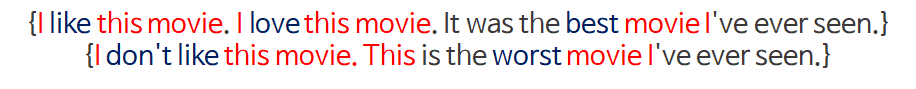

The "Feature Extraction" process is performed using the content of Item as a vector.
It captures important words that appear a lot based on frequency. This method is called a Counter Vectorizer.

However, since Counter Vectorizer only calculates simple frequencies, there is a limitation in that words that appear a lot in sentences are high, although they have no meaning like investigations and articles. The TF-IDF technique is to give a penalty to these words (I, this, movie, etc.) and to catch only the appropriately important words.



Check from the Counter Vectorizer that composes the TF

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(tokenizer=get_pos)

# Transform the sentence into a Counter Vectorizer form
countvect = vect.fit_transform(docs)
countvect

<156x3835 sparse matrix of type '<class 'numpy.int64'>'
	with 16777 stored elements in Compressed Sparse Row format>

156x3835 means that 3835 words on 156 menus.




In [ ]:
# Find out how each menu is vectorized through toarray()
# But I don't know what each index and column means
countvect.toarray()

array([[0, 1, 6, ..., 0, 4, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 4, ..., 1, 0, 0]])

Values 0, 1, 2 : Assigned according to the number of occurrences of a word in the document.

To know what each index and column means, we need to extract the vocabulary_ information from the object and look at the information.

In [ ]:
vect.vocabulary_

{'ÎÇ†Ïî®': 531,
 'Ï∂îÎã§': 3306,
 'ÌïòÎã§': 3636,
 'Í∞ÑÎßå': 51,
 'ÏãúÌÇ§Îã§': 2019,
 'Î®πÎã§': 1220,
 'Ï†ïÎßê': 2905,
 'ÎßõÏûàÎã§': 1157,
 'ÏñëÌåå': 2236,
 'Ïû•ÏïÑÏ∞å': 2814,
 'Î≥ÑÎ£®': 1519,
 'Îã§Î•¥Îã§': 670,
 'ÏôÑÏ†Ñ': 2445,
 'ÎßåÏ°±ÌïòÎã§': 1116,
 'Í≥µÍ∏∞': 255,
 'Î∞∞': 1458,
 'ÌÑ∞ÏßÄÎã§': 3461,
 'Í∞ôÎã§': 104,
 'ÎÑòÎã§': 584,
 'ÍπîÎÅó': 433,
 'ÏûêÎã§': 2756,
 'ÏòàÏÉÅ': 2374,
 'ÏãúÍ∞Ñ': 1994,
 'Îä¶Îã§': 653,
 'Ïò§Îã§': 2387,
 'Îî∞ÎúªÌïòÎã§': 921,
 'Í≥≥': 250,
 'ÎÑ£Îã§': 591,
 'Î≥¥Í¥Ä': 1527,
 'Ï§ëÏù¥': 3031,
 'ÏÖ®': 1881,
 'Í∞êÎèô': 71,
 'ÏïÑÍ∏∞': 2121,
 'ÏûàÎã§': 2746,
 'Î∞ñ': 1420,
 'Ïñ¥ÏÑú': 2254,
 'ÌôîÏÉÅ': 3772,
 'Ïã≠': 2077,
 'Í≤É': 165,
 'ÏÇ¨Î®πÎã§': 1753,
 'Î∞∞Îã¨': 1461,
 'ÎêòÏñ¥Îã§': 856,
 'Ï¢ãÎã§': 2983,
 'Í≥†Í∏∞': 209,
 'ÏñëÎèÑ': 2228,
 'Ìë∏Îã§': 3596,
 'Ïßê': 3098,
 'Î∂ÄÎìúÎüΩÎã§': 1587,
 'Ï∂îÏ≤ú': 3313,
 'Ìï¥': 3686,
 'Ï≤òÏùå': 3241,
 'Ï£ºÎ¨∏': 3000,
 'Íµ¨ÏÑ±': 295,
 'Îßõ': 1139,
 'Î≠ê': 1352,
 'ÌïòÎÇò': 3633,
 'Îπ†ÏßÄÎã§': 1708,
 'ÎÇòÎã§': 504,
 'ÏòàÏ†Ñ': 2378,
 'Îï

It has a value in the form of a dictionary, where each value means the position of the column, and the key means the word in the corresponding column.

For example, ''Ïò§ÎûòÏò§Îûò': 2376' means the 2376th column.

To make it look good, we will sort by value.

In [ ]:
sorted(vect.vocabulary_)[:10]

['Í∞ÄÍ∞Ä', 'Í∞ÄÍ≤å', 'Í∞ÄÍ≤©', 'Í∞ÄÍ∏∞', 'Í∞ÄÍπåÏù¥', 'Í∞ÄÍπùÎã§', 'Í∞ÄÎÅî', 'Í∞ÄÎä•ÌïòÎã§', 'Í∞ÄÎã§', 'Í∞ÄÎã§ÎûëÏñ¥Ìè¨']

In [ ]:
import pandas as pd
#Giving column and row indexes
countvect_df = pd.DataFrame(countvect.toarray(), columns = sorted(vect.vocabulary_))
countvect_df.index = menu_index
countvect_df

Í∞ÄÍ∞Ä  Í∞ÄÍ≤å  Í∞ÄÍ≤©  Í∞ÄÍ∏∞  Í∞ÄÍπåÏù¥  Í∞ÄÍπùÎã§  Í∞ÄÎÅî  ...  Ìù°ÏûÖ  Ìù•Í±¥  Ìù¨Îã§  ÌûòÎÇ¥Îã§  ÌûòÎìúÎã§  ÌûòÎì§Îã§  Ìûú
85Íµ≠Î∞•         0   1   6   0    0    0   1  ...   1   0   0    0    0    4  0
T-REXÎ≤ÑÍ±∞      0   0   0   0    0    0   0  ...   0   0   0    0    0    0  0
doubleX2Î≤ÑÍ±∞   0   0   0   0    0    0   0  ...   0   0   0    0    0    0  0
Í∞àÎ¶≠Ï°±          0   0   0   0    0    0   0  ...   0   0   0    0    0    0  0
Í∞àÎ¶≠ÏπòÏ¶à ÌÉÄÏΩîÏïºÎÅº    0   0   0   0    0    0   1  ...   0   0   0    0    0    0  0
...         ..  ..  ..  ..  ...  ...  ..  ...  ..  ..  ..  ...  ...  ... ..
Ìï´ÌÅ¨Î¶¨Ïä§ÌîºÎ≤ÑÍ±∞      0   0   0   0    0    0   0  ...   0   0   0    0    0    0  0
Ìï¥Î¨º ÏàúÎëêÎ∂ÄÏ∞åÍ∞ú     0   1   1   0    0    0   0  ...   0   0   0    0    0    0  0
Ìñ•Ï±ÑÏ°±          0   0   0   0    0    0   0  ...   0   0   0    0    0    0  0
ÌôçÏñ¥ÏÇºÌï©         0   0   0   0    0    0   0  ...   0   0   0    0    0    0  0
Ìô©Í∏àÏò¨Î¶¨Î∏åÏπòÌÇ®      0   0   4   0    0    0   2  ...   0   0   0    0    1    0  0

[156 rows x 3835 columns]

In [ ]:
# Calculate the similarity of each vector through the above data frame
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity(countvect_df, countvect_df)
#This allows us to know which menus are similar.

array([[1.        , 0.03780291, 0.17345162, ..., 0.4846235 , 0.59053673,
        0.46047587],
       [0.03780291, 1.        , 0.30759929, ..., 0.        , 0.        ,
        0.22976242],
       [0.17345162, 0.30759929, 1.        , ..., 0.02687154, 0.        ,
        0.29797863],
       ...,
       [0.4846235 , 0.        , 0.02687154, ..., 1.        , 0.28097574,
        0.25288193],
       [0.59053673, 0.        , 0.        , ..., 0.28097574, 1.        ,
        0.19776079],
       [0.46047587, 0.22976242, 0.29797863, ..., 0.25288193, 0.19776079,
        1.        ]])

##Perform TF-IDF in the same way

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(tokenizer= get_pos) #tokenizer= get_pos : tokenize with morphemes
tfvect = vect.fit(docs)
tfidf_matrix = vect.fit_transform(menu_review['review'])

tfidv_df = pd.DataFrame(tfvect.transform(docs).toarray(), columns = sorted(vect.vocabulary_))
tfidv_df.index = menu_index
tfidv_df

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"


Í∞ÄÍ∞Ä        Í∞ÄÍ≤å        Í∞ÄÍ≤©   Í∞ÄÍ∏∞  ...  ÌûòÎÇ¥Îã§       ÌûòÎìúÎã§       ÌûòÎì§Îã§    Ìûú
85Íµ≠Î∞•        0.0  0.005008  0.021211  0.0  ...  0.0  0.000000  0.018991  0.0
T-REXÎ≤ÑÍ±∞     0.0  0.000000  0.000000  0.0  ...  0.0  0.000000  0.000000  0.0
doubleX2Î≤ÑÍ±∞  0.0  0.000000  0.000000  0.0  ...  0.0  0.000000  0.000000  0.0
Í∞àÎ¶≠Ï°±         0.0  0.000000  0.000000  0.0  ...  0.0  0.000000  0.000000  0.0
Í∞àÎ¶≠ÏπòÏ¶à ÌÉÄÏΩîÏïºÎÅº   0.0  0.000000  0.000000  0.0  ...  0.0  0.000000  0.000000  0.0
...         ...       ...       ...  ...  ...  ...       ...       ...  ...
Ìï´ÌÅ¨Î¶¨Ïä§ÌîºÎ≤ÑÍ±∞     0.0  0.000000  0.000000  0.0  ...  0.0  0.000000  0.000000  0.0
Ìï¥Î¨º ÏàúÎëêÎ∂ÄÏ∞åÍ∞ú    0.0  0.028861  0.020373  0.0  ...  0.0  0.000000  0.000000  0.0
Ìñ•Ï±ÑÏ°±         0.0  0.000000  0.000000  0.0  ...  0.0  0.000000  0.000000  0.0
ÌôçÏñ¥ÏÇºÌï©        0.0  0.000000  0.000000  0.0  ...  0.0  0.000000  0.000000  0.0
Ìô©Í∏àÏò¨Î¶¨Î∏åÏπòÌÇ®     0.0  0.000000  0.040826  0.0  ...  0.0  0.016661  0.000000  0.0

[156 rows x 3835 columns]

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity(tfidv_df, tfidv_df)

array([[1.        , 0.02262221, 0.08201492, ..., 0.25010643, 0.29703948,
        0.25961176],
       [0.02262221, 1.        , 0.24946857, ..., 0.        , 0.        ,
        0.17690417],
       [0.08201492, 0.24946857, 1.        , ..., 0.01093852, 0.        ,
        0.10917439],
       ...,
       [0.25010643, 0.        , 0.01093852, ..., 1.        , 0.09645434,
        0.0903854 ],
       [0.29703948, 0.        , 0.        , ..., 0.09645434, 1.        ,
        0.07251557],
       [0.25961176, 0.17690417, 0.10917439, ..., 0.0903854 , 0.07251557,
        1.        ]])



*   Both TF-IDF and CounterVectorizer have the characteristic of creating a vector with all the words appearing in the content.

* So, as the content increases and the total number of words increases, the dimension of the vector will grow and the matrix will become unmanageable.
* To prevent this problem, there is a `max_features` parameter that tells you to use only the n most frequent words.



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(tokenizer= get_pos, max_features=10) #set max_features is 10.
tfvect = vect.fit(docs)
tfidv_df = pd.DataFrame(tfvect.transform(docs).toarray(), columns = sorted(vect.vocabulary_))
tfidv_df.index = menu_index
tfidv_df

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"


ÎßéÎã§         Îßõ       ÎßõÏûàÎã§  ...        ÏûêÎã§        Ï¢ãÎã§        ÌïòÎã§
85Íµ≠Î∞•        0.207110  0.183602  0.522743  ...  0.201797  0.165197  0.203218
T-REXÎ≤ÑÍ±∞     0.000000  1.000000  0.000000  ...  0.000000  0.000000  0.000000
doubleX2Î≤ÑÍ±∞  0.000000  0.835374  0.000000  ...  0.000000  0.201285  0.347836
Í∞àÎ¶≠Ï°±         0.000000  0.304940  0.469787  ...  0.378252  0.183689  0.000000
Í∞àÎ¶≠ÏπòÏ¶à ÌÉÄÏΩîÏïºÎÅº   0.000000  0.171180  0.879059  ...  0.106167  0.103115  0.089096
...              ...       ...       ...  ...       ...       ...       ...
Ìï´ÌÅ¨Î¶¨Ïä§ÌîºÎ≤ÑÍ±∞     0.000000  0.000000  0.000000  ...  0.000000  0.000000  1.000000
Ìï¥Î¨º ÏàúÎëêÎ∂ÄÏ∞åÍ∞ú    0.165099  0.516886  0.353915  ...  0.213718  0.092255  0.199281
Ìñ•Ï±ÑÏ°±         0.000000  0.000000  0.140197  ...  0.000000  0.000000  0.142095
ÌôçÏñ¥ÏÇºÌï©        0.000000  0.000000  0.403549  ...  0.487380  0.000000  0.000000
Ìô©Í∏àÏò¨Î¶¨Î∏åÏπòÌÇ®     0.066866  0.248111  0.175191  ...  0.057705  0.112092  0.710250

[156 rows x 10 columns]

In [ ]:
# Stopwords: Remove non-significant word tokens
#(idf has a similar role, but idf only gives some penalty, but removes stopwords altogether.)
tfidf = TfidfVectorizer(analyzer = 'word')
# Perform tf-idf for review
#TF is, after all, 'the more it appears, the more important it is.' It assumes that
#IDF rearranging, total number of documents / number of documents containing t - special word
tfidf_matrix = tfidf.fit_transform(menu_review['review'])
print(tfidf_matrix.shape)
print(sorted(tfidf.vocabulary_.items()))

(156, 14554)
[('bbcÍ∞Ä', 0), ('bbq', 1), ('bbqÎäî', 2), ('bbqÎ•º', 3), ('bbqÏùò', 4), ('bhc', 5), ('bhcÎäî', 6), ('bhcÏùò', 7), ('bhcÏπòÌÇ®', 8), ('bhcÏπòÌÇ®Î©îÎâ¥', 9), ('bhcÏπòÌÇ®ÏùÄ', 10), ('jmt', 11), ('jmtÎ¶¨Î∑∞Ïù¥Î≤§Ìä∏', 12), ('jmtÏó≠ÏãúÏµúÍ≥†ÏûÖÎãàÎãπ', 13), ('jmtÌÉÄÏΩîÏïºÌÇ§', 14), ('lÎ•º', 15), ('Í∞ÄÍ≤å', 16), ('Í∞ÄÍ≤åÍ∞Ä', 17), ('Í∞ÄÍ≤åÍ∞ÄÏÑú', 18), ('Í∞ÄÍ≤åÏóê', 19), ('Í∞ÄÍ≤åÏóêÏÑú', 20), ('Í∞ÄÍ≤åÏóêÏöî', 21), ('Í∞ÄÍ≤åÏôÄÎäî', 22), ('Í∞ÄÍ≤©', 23), ('Í∞ÄÍ≤©Í≥º', 24), ('Í∞ÄÍ≤©ÎåÄÎπÑ', 25), ('Í∞ÄÍ≤©ÎåÄÎπÑÏµúÍ≥†ÏóêÏöîÎ¨¥ÎÇúÌïòÍ≤å', 26), ('Í∞ÄÍ≤©ÎåÄÏóê', 27), ('Í∞ÄÍ≤©ÎåÄÏõêÏóê', 28), ('Í∞ÄÍ≤©ÎèÑ', 29), ('Í∞ÄÍ≤©Ïóê', 30), ('Í∞ÄÍ≤©ÏùÄ', 31), ('Í∞ÄÍ≤©Ïù¥', 32), ('Í∞ÄÍ≤©Ïù¥ÎùºÎãàÏöî', 33), ('Í∞ÄÍ≤©Ïù∏ÏÉÅ', 34), ('Í∞ÄÍ∏∞ÎèÑ', 35), ('Í∞ÄÍπåÏö¥', 36), ('Í∞ÄÍπåÏõå', 37), ('Í∞ÄÍπåÏõåÏÑú', 38), ('Í∞ÄÍπåÏõåÏöî', 39), ('Í∞ÄÍπåÏõ†Îã§', 40), ('Í∞ÄÍπåÏõ†ÏßÄÎßå', 41), ('Í∞ÄÍπåÏù¥', 42), ('Í∞ÄÍπùÍ∏¥ÌïòÏßÄÎßå', 43), ('Í∞ÄÎÅî', 44), ('Í∞ÄÎÅîÎßå', 45), ('Í∞ÄÎÅîÏî©', 46), ('Í∞ÄÎÅîÏù¥ÏßÄÎßå', 47), ('

In [ ]:
#Measure the similarity through the cosine_similarity function
from sklearn.metrics.pairwise import cosine_similarity
cosine_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

print(cosine_matrix.shape)
np.round(cosine_matrix, 4)

(156, 156)


array([[1.    , 0.0136, 0.0117, ..., 0.0587, 0.0923, 0.0936],
       [0.0136, 1.    , 0.025 , ..., 0.    , 0.    , 0.0161],
       [0.0117, 0.025 , 1.    , ..., 0.    , 0.    , 0.022 ],
       ...,
       [0.0587, 0.    , 0.    , ..., 1.    , 0.    , 0.0058],
       [0.0923, 0.    , 0.    , ..., 0.    , 1.    , 0.0029],
       [0.0936, 0.0161, 0.022 , ..., 0.0058, 0.0029, 1.    ]])

By taking a similarity matrix, the similarity was calculated for all menus.

However, it is not possible to know which food the corresponding index is.

##Create a dictionary to map menu names and ids.

In [ ]:
# Create a dictionary to map menu names and ids.
menuid= {}
for i, c in enumerate(menu_review['menu']): menuid[i] = c

# Create a dictionary to map ids to menu names.
idmenu = {}
for i, c in menuid.items(): idmenu[c] = i

In [ ]:
idmenu

{'85Íµ≠Î∞•': 0,
 'T-REXÎ≤ÑÍ±∞': 1,
 'doubleX2Î≤ÑÍ±∞': 2,
 'Í∞àÎ¶≠Ï°±': 3,
 'Í∞àÎ¶≠ÏπòÏ¶à ÌÉÄÏΩîÏïºÎÅº': 4,
 'Í∞êÎ∞îÏä§ÏôÄ Ìò∏Î∞ÄÎπµ': 5,
 'Í≥†Í∏∞ ÏàúÎëêÎ∂ÄÏ∞åÍ∞ú': 6,
 'Í≥†Ïä§Ìä∏ÌéòÌååÎ°úÎãà ÌîºÏûê': 7,
 'Í≥®ÎìúÌÇπ': 8,
 'ÍπÄÏπò Î≤†Ïù¥Ïª® ÌïÑÎùºÌîÑ 1Ïù∏Î∂Ñ': 9,
 'ÍπÄÏπòÏ∞åÍ∞ú': 10,
 'ÍπÄÏπòÏ∞åÍ∞ú&ÎåÄÌå®ÏÇºÍ≤πÍµ¨Ïù¥': 11,
 'ÍπÄÏπòÏ∞åÍ∞ú&ÏñëÎÖêÍ≤åÏû•': 12,
 'ÍπÄÏπòÏ∞åÍ∞ú&Ï†úÏú°Î≥∂Ïùå': 13,
 'ÍπåÎ•¥Î≥¥ÎÇòÎùºÎàÑÎì§Îñ°Î≥∂Ïù¥': 14,
 'ÍπåÎßåÏ∞úÎã≠': 15,
 'ÍøîÎ∞îÎ°úÏö∞': 16,
 'ÎÇ†ÏπòÏïåÏπòÏ¶à ÌÉÄÏΩîÏïºÎÅº': 17,
 'ÎÇ¥Ïû•Íµ≠Î∞•': 18,
 'ÎÉâÏ±ÑÏ°±': 19,
 'Îã®Ïß†ÏúôÎ¥â': 20,
 'ÎçîÎ∏îÎ∞îÎ≤†ÌÅê ÌîºÏûê': 21,
 'ÎçîÎ∏îÌè¨ÌÅ¨Ïâ¨Î¶ºÌîÑ ÏΩòÏπòÏ¶à': 22,
 'ÎçîÎ∏îÌè¨ÌÅ¨Ïâ¨Î¶ºÌîÑ ÌîºÏûê': 23,
 'Îç∞Î¶¨ÏïºÎÅºÏ°±': 24,
 'ÎèºÏßÄÍ≥†Í∏∞ ÍπÄÏπòÏ∞åÍ∞ú': 25,
 'Îñ°Í∞àÎπÑÎß§ÏΩ§ÌÅ¨Î¶ºÌååÏä§ÌÉÄ': 26,
 'Î†àÎìúÎßàÏöîÏπòÌÇ®': 27,
 'Î°úÏ†úÎàÑÎì§Îñ°Î≥∂Ïù¥': 28,
 'Î°úÏ†úÎñ°Î≥∂Ïù¥': 29,
 'Î°úÏ†úÎ∂ÑÎ™®ÏûêÎñ°Î≥∂Ïù¥': 30,
 'Î°úÏ†úÏ∞úÎã≠': 31,
 'Î¶¨ÏïÑÎØ∏ÎùºÌÅ¥Î≤ÑÍ±∞': 32,
 'ÎßàÎùºÏÉÅÍ∂à': 33,
 'ÎßàÎùºÌÉï': 34,
 'ÎßàÏôïÏπòÌÇ®': 35,
 

The top 10 menus are recommended through the similarity function created in this way.

First, extract the index of the desired menu '85 Gukbap' from the dictionary of idmenu.
In this case, idx will be 0. With this idx value, we now extract the menu with idx 0 from the cosine_matrix, the similarity value and index.

##For example, 10 top menu recommendations similar to 85Íµ≠Î∞•

In [ ]:
# Extract id of specific menu
idx = idmenu['85Íµ≠Î∞•']
sim_scores = [(i, c) for i, c in enumerate(cosine_matrix[idx]) if i != idx] # Extract similarity and index of foods excluding themselves
sim_scores = sorted(sim_scores, key = lambda x: x[1], reverse=True) # Sort by similarity # Extract the top 10 indexes and similarities
# convert index to menu name
sim_scores = [(menuid[i], score) for i, score in sim_scores[0:10]]
sim_scores

[('Î∂àÌñ•Ï≠àÍæ∏ÎØ∏Î≥∂Ïùå', 0.46219423919197483),
 ('ÎèºÏßÄÍ≥†Í∏∞ ÍπÄÏπòÏ∞åÍ∞ú', 0.423297458360311),
 ('Ïû•Î™®ÏôïÏ°±(Îí∑Îã§Î¶¨)', 0.39898926506283566),
 ('Ïó∞Ïñ¥ÏÇ¨ÏãúÎØ∏', 0.39552445236496014),
 ('ÏÑûÏñ¥Íµ≠Î∞•', 0.3934794203579125),
 ('Ïû•Î™®ÏôïÏ°±(ÏïûÎã§Î¶¨)', 0.37989780314803046),
 ('ÏñºÌÅ∞Íµ≠Î∞•', 0.3706452475255758),
 ('Î∂àÏä§ÏπòÏ¶àÎñ°Î≥∂Ïù¥', 0.35589672594300786),
 ('Ïò§Î¶¨ÏßÄÎÑêÌÉÄÏΩîÏïºÎÅº', 0.34608621323832034),
 ('ÍπÄÏπòÏ∞åÍ∞ú', 0.3439325994433438)]

In [ ]:
#Provide menu list
print(menu_index)
print('Among the food candidates, Enter the name of your favorite food: ')
# Enter the name of your favorite food
# If you enter it incorrectly, ask for it again
while True:
  i_like = str(input("I like "))
  if i_like in menu_index:
    break
  else :
    print('Please enter the food name correctly.')

#disliked food menu
dislike_list = []
print('Among the food candidates, Enter dislike food names:')
print("Enter one menu at a time. When you're done, Enter 'f'.")
while True:
  dislike = str(input("I don't like "))
  if dislike == 'f':
    break
  elif dislike not in menu_index:
    print('Please enter the food name correctly.')
  else:
    dislike_list.append(idmenu[dislike]) #Add id of disliked food
    dis_idx = idmenu[dislike] #Add the ids of the top 3 foods similar to the disliked food

    sim_scores = [(i, c) for i, c in enumerate(cosine_matrix[dis_idx]) if i != dis_idx ]
    sim_scores = sorted(sim_scores, key = lambda x: x[1], reverse=True)
    sim_scores = sim_scores[0:2] # Extract only the top 2 menu items (index, score) similar to the food you dislike
    for i in range(len(sim_scores)):
      dislike_list.append(sim_scores[i][0]) #sim_scores[i][0] Extract the idx of the menu to dislike or similar, and add it to dislike_list


# Enter the menu you do not want to eat because you have recently eaten
ideaten_list = []
print('Among the food candidates, Enter food names that you have recently eaten: ')
print("Enter one menu at a time. When you're done, Enter 'f'.")
while True:
  ideaten = str(input("I have recently eaten "))
  if ideaten == 'f':
    break
  elif ideaten not in menu_index:
    print('Please enter the food name correctly.')
  else:
    ideaten_list.append(idmenu[ideaten])

#Number of menus to be recommended
while True:
  n = input('How many menus would you like to recommend? :')
  if int(n) >= 50 :
    print('Too many! Enter less.')
  elif type(n) != 'int':
    print('Please enter the integer correctly.')
  n = int(n)
  break

sim_scores = [(i, c) for i, c in enumerate(cosine_matrix[idx]) if i != idx ]
sim_scores = sorted(sim_scores, key = lambda x: x[1], reverse=True)
sim_scores = [(menuid[i], score) for i, score in sim_scores if i not in ideaten_list and i not in dislike_list]

sim = [] #similarity
for j in range(40):
  sim.append(sim_scores[j][1])
new_rating=[] #guessing the user's rating
for j in range(n):
  new_rating.append(5*(sim_scores[j][1] - min(sim))/(max(sim)-min(sim)))

recom = [] #add name of store
for j in range(n):
  food = sim_scores[j][0]
  my_menu = final_data.index[final_data['menu'] == food][0]
  store = final_data['store'][my_menu]
  recom.append((store,)+ sim_scores[j])
final_recom = [] #add new_rating
for i in range(len(recom)):
  final_recom.append([(recom[i][0]), (recom[i][1]), new_rating[i].round(1)])
final_recom[:n]

['85Íµ≠Î∞•', 'T-REXÎ≤ÑÍ±∞', 'doubleX2Î≤ÑÍ±∞', 'Í∞àÎ¶≠Ï°±', 'Í∞àÎ¶≠ÏπòÏ¶à ÌÉÄÏΩîÏïºÎÅº', 'Í∞êÎ∞îÏä§ÏôÄ Ìò∏Î∞ÄÎπµ', 'Í≥†Í∏∞ ÏàúÎëêÎ∂ÄÏ∞åÍ∞ú', 'Í≥†Ïä§Ìä∏ÌéòÌååÎ°úÎãà ÌîºÏûê', 'Í≥®ÎìúÌÇπ', 'ÍπÄÏπò Î≤†Ïù¥Ïª® ÌïÑÎùºÌîÑ 1Ïù∏Î∂Ñ', 'ÍπÄÏπòÏ∞åÍ∞ú', 'ÍπÄÏπòÏ∞åÍ∞ú&ÎåÄÌå®ÏÇºÍ≤πÍµ¨Ïù¥', 'ÍπÄÏπòÏ∞åÍ∞ú&ÏñëÎÖêÍ≤åÏû•', 'ÍπÄÏπòÏ∞åÍ∞ú&Ï†úÏú°Î≥∂Ïùå', 'ÍπåÎ•¥Î≥¥ÎÇòÎùºÎàÑÎì§Îñ°Î≥∂Ïù¥', 'ÍπåÎßåÏ∞úÎã≠', 'ÍøîÎ∞îÎ°úÏö∞', 'ÎÇ†ÏπòÏïåÏπòÏ¶à ÌÉÄÏΩîÏïºÎÅº', 'ÎÇ¥Ïû•Íµ≠Î∞•', 'ÎÉâÏ±ÑÏ°±', 'Îã®Ïß†ÏúôÎ¥â', 'ÎçîÎ∏îÎ∞îÎ≤†ÌÅê ÌîºÏûê', 'ÎçîÎ∏îÌè¨ÌÅ¨Ïâ¨Î¶ºÌîÑ ÏΩòÏπòÏ¶à', 'ÎçîÎ∏îÌè¨ÌÅ¨Ïâ¨Î¶ºÌîÑ ÌîºÏûê', 'Îç∞Î¶¨ÏïºÎÅºÏ°±', 'ÎèºÏßÄÍ≥†Í∏∞ ÍπÄÏπòÏ∞åÍ∞ú', 'Îñ°Í∞àÎπÑÎß§ÏΩ§ÌÅ¨Î¶ºÌååÏä§ÌÉÄ', 'Î†àÎìúÎßàÏöîÏπòÌÇ®', 'Î°úÏ†úÎàÑÎì§Îñ°Î≥∂Ïù¥', 'Î°úÏ†úÎñ°Î≥∂Ïù¥', 'Î°úÏ†úÎ∂ÑÎ™®ÏûêÎñ°Î≥∂Ïù¥', 'Î°úÏ†úÏ∞úÎã≠', 'Î¶¨ÏïÑÎØ∏ÎùºÌÅ¥Î≤ÑÍ±∞', 'ÎßàÎùºÏÉÅÍ∂à', 'ÎßàÎùºÌÉï', 'ÎßàÏôïÏπòÌÇ®', 'ÎßõÏ¥àÌÇπ', 'Îß§Ïö¥ÏÇºÍ≤πÏÇ¥ ÎçÆÎ∞•ÔºãÎêúÏû•Ï∞åÍ∞ú', 'Îß§ÏΩ§ÏñëÎÖêÎ∞òÎ∞òÏ°±', 'Îß§ÏΩ§ÌÅ¨Î¶º Î¶¨Ï°∞Îòê', 'Îß§ÏΩ§ÌÅ¨Î¶º ÌååÏä§ÌÉÄ', 'Î™ÖÎûÄÎßàÏöî ÌÉÄÏΩîÏïºÎÅº', 'Î™ÖÎûÄÏπò

[['·Ñâ·Öµ·Ü´·Ñé·Ö•·Ü´·Ñç·ÖÆ·ÑÅ·ÖÆ·ÑÜ·Öµ·ÑÜ·ÖÆ·Ü´·Ñâ·ÖÆ·Ñå·Ö•·Ü∑', 'Î∂àÌñ•Ï≠àÍæ∏ÎØ∏Î≥∂Ïùå', 5.0],
 ['·Ñã·Ö©·ÜØ·Ñá·Ö°·ÑÖ·Ö≥·Ü´·ÑÄ·Öµ·Ü∑·Ñé·Öµ·Ñç·Öµ·ÑÄ·Ö¢&·Ñã·Ö£·Üº·ÑÇ·Öß·Ü∑·ÑÄ·Ö¶·Ñå·Ö°·Üº', 'ÎèºÏßÄÍ≥†Í∏∞ ÍπÄÏπòÏ∞åÍ∞ú', 4.5],
 ['·Ñå·Ö°·Üº·ÑÜ·Ö©·Ñå·Ö©·Ü®·Ñá·Ö°·ÜØ', 'Ïû•Î™®ÏôïÏ°±(Îí∑Îã§Î¶¨)', 4.1],
 ['ÏÉùÏó∞Ïñ¥Ï†ÑÎ¨∏Ï†êÏ≤≠Ïó∞', 'Ïó∞Ïñ¥ÏÇ¨ÏãúÎØ∏', 4.1],
 ['85·ÑÄ·ÖÆ·Ü®·Ñá·Ö°·Ü∏&·ÑÇ·Ö¢·Üº·ÑÜ·Öß·Ü´', 'ÏÑûÏñ¥Íµ≠Î∞•', 4.0],
 ['·Ñå·Ö°·Üº·ÑÜ·Ö©·Ñå·Ö©·Ü®·Ñá·Ö°·ÜØ', 'Ïû•Î™®ÏôïÏ°±(ÏïûÎã§Î¶¨)', 3.9],
 ['85·ÑÄ·ÖÆ·Ü®·Ñá·Ö°·Ü∏&·ÑÇ·Ö¢·Üº·ÑÜ·Öß·Ü´', 'ÏñºÌÅ∞Íµ≠Î∞•', 3.7],
 ['·Ñá·ÖÆ·ÜØ·Ñâ·Ö≥·ÑÑ·Ö•·Ü®·Ñá·Ö©·Ü©·Ñã·Öµ', 'Î∂àÏä§ÏπòÏ¶àÎñ°Î≥∂Ïù¥', 3.5],
 ['·Ñê·Ö°·Ñè·Ö©·Ñã·Ö£·Ñè·Öµ·Üº', 'Ïò§Î¶¨ÏßÄÎÑêÌÉÄÏΩîÏïºÎÅº', 3.4],
 ['·Ñã·Ö©·ÜØ·Ñá·Ö°·ÑÖ·Ö≥·Ü´·ÑÄ·Öµ·Ü∑·Ñé·Öµ·Ñç·Öµ·ÑÄ·Ö¢&·Ñã·Ö£·Üº·ÑÇ·Öß·Ü∑·ÑÄ·Ö¶·Ñå·Ö°·Üº', 'ÍπÄÏπòÏ∞åÍ∞ú', 3.3]]

## Accuracy Test

In [ ]:
survey_data=pd.read_excel('ÎßåÏ°±Îç∞Ïù¥ÌÑ∞.xlsx')

In [ ]:
survey_data

User_Id  Expected_rating  Actual_rating  Recommendation_satisfying_score
0         1              3.7            5.1                              4.7
1         2              3.6            4.0                              5.0
2         3              3.9            3.5                              4.0
3         4              4.1            4.4                              4.4
4         5              4.4            3.0                              3.5
5         6              3.5            4.0                              5.0
6         7              3.6            5.0                              5.0
7         8              3.4            2.8                              3.1
8         9              4.6            4.5                              4.5
9        10              3.5            4.7                              3.8
10       11              2.7            5.0                              5.0
11       12              3.2            3.0                              2.5
12       13              2.4            3.5                              4.0
13       14              3.5            3.2                              2.6
14       15              3.9            2.5                              2.5
15       16              3.4            5.0                              5.0
16       17              2.8            4.0                              5.0
17       18              3.2            3.4                              1.2
18       19              4.1            3.8                              3.8
19       20              3.9            5.0                              4.8

In [ ]:
survey_data['error'] = (survey_data['Expected_rating'] - survey_data['Actual_rating'])**2
survey_data

User_Id  Expected_rating  ...  Recommendation_satisfying_score  error
0         1              3.7  ...                              4.7   1.96
1         2              3.6  ...                              5.0   0.16
2         3              3.9  ...                              4.0   0.16
3         4              4.1  ...                              4.4   0.09
4         5              4.4  ...                              3.5   1.96
5         6              3.5  ...                              5.0   0.25
6         7              3.6  ...                              5.0   1.96
7         8              3.4  ...                              3.1   0.36
8         9              4.6  ...                              4.5   0.01
9        10              3.5  ...                              3.8   1.44
10       11              2.7  ...                              5.0   5.29
11       12              3.2  ...                              2.5   0.04
12       13              2.4  ...                              4.0   1.21
13       14              3.5  ...                              2.6   0.09
14       15              3.9  ...                              2.5   1.96
15       16              3.4  ...                              5.0   2.56
16       17              2.8  ...                              5.0   1.44
17       18              3.2  ...                              1.2   0.04
18       19              4.1  ...                              3.8   0.09
19       20              3.9  ...                              4.8   1.21

[20 rows x 5 columns]

In [ ]:
Total_error = np.mean(survey_data['error'])
Total_error

1.114

In [ ]:
Satisfying_score = np.mean(survey_data['Recommendation_satisfying_score'])
Satisfying_score

3.9699999999999998